In [1]:
from google.colab import files

uploaded = files.upload()

Saving nepsealpha_export_price_NTC_2022-01-01_2025-07-11.csv to nepsealpha_export_price_NTC_2022-01-01_2025-07-11.csv


In [12]:
import pandas as pd

df = pd.read_csv("nepsealpha_export_price_NTC_2022-01-01_2025-07-11.csv")
df.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NTC,2025-07-10,851.0,855.0,849.0,853.30,0.80 %,"20,896.00"
1,NTC,2025-07-09,843.0,850.0,842.0,846.55,0.18 %,"11,850.00"
2,NTC,2025-07-08,850.0,850.0,844.0,845.03,-0.44 %,"16,713.00"
3,NTC,2025-07-07,850.0,858.7,845.0,848.77,-0.29 %,"12,972.00"
4,NTC,2025-07-06,860.0,860.0,848.3,851.24,0.62 %,"27,701.00"


In [13]:
import numpy as np
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

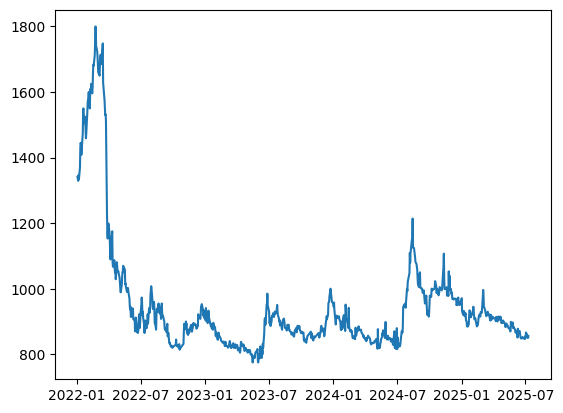

In [14]:
plt.figure()
plt.plot(df['Date'], df['High'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
close_price=df['High'].values.reshape(-1, 1)  # pandas series to single row

scaler = MinMaxScaler(feature_range=(0,1))
close_price = scaler.fit_transform(close_price)

close_price

array([[0.552249  ],
       [0.54639477],
       [0.54054054],
       [0.55751781],
       [0.54541907],
       [0.58054444],
       [0.6405503 ],
       [0.65372231],
       [0.64786808],
       [0.61820665],
       [0.66347936],
       [0.68201776],
       [0.75226851],
       [0.75617133],
       [0.71158162],
       [0.73177871],
       [0.71714314],
       [0.69275051],
       [0.66738218],
       [0.68299346],
       [0.74641428],
       [0.77568543],
       [0.78056396],
       [0.80495658],
       [0.75617133],
       [0.79519953],
       [0.81471363],
       [0.80485901],
       [0.8293492 ],
       [0.80095619],
       [0.81764075],
       [0.85862035],
       [0.88594009],
       [0.88301298],
       [0.91325983],
       [0.94545809],
       [1.        ],
       [0.99912187],
       [0.94253098],
       [0.9269197 ],
       [0.91228413],
       [0.86349888],
       [0.85364426],
       [0.89764855],
       [0.91618695],
       [0.8878915 ],
       [0.91716265],
       [0.931

In [16]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(close_price)

X

array([[0.552249  , 0.54639477, 0.54054054, ..., 0.36881647, 0.39994146,
        0.4136989 ],
       [0.54639477, 0.54054054, 0.55751781, ..., 0.39994146, 0.4136989 ,
        0.38833057],
       [0.54054054, 0.55751781, 0.54541907, ..., 0.4136989 , 0.38833057,
        0.36588936],
       ...,
       [0.12293882, 0.13562299, 0.13064689, ..., 0.08937457, 0.08293492,
        0.0816665 ],
       [0.13562299, 0.13064689, 0.12196312, ..., 0.08293492, 0.0816665 ,
        0.07317787],
       [0.13064689, 0.12196312, 0.13659869, ..., 0.0816665 , 0.07317787,
        0.07317787]])

In [17]:
X = X.reshape((X.shape[0], X.shape[1], 1)) # for lstms

In [18]:
split_date = pd.Timestamp('2025-01-01')
split_index = df[df['Date'] >= split_date].index[0]  # row where 2025 starts

adjusted_split_index = split_index - 60

X_train, y_train = X[:adjusted_split_index], y[:adjusted_split_index]
X_test, y_test = X[adjusted_split_index:], y[adjusted_split_index:]

print(X_train.shape[0],
X_test.shape[0])

63 702


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0384 - val_loss: 0.0053
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - loss: 0.0017 - val_loss:

In [24]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


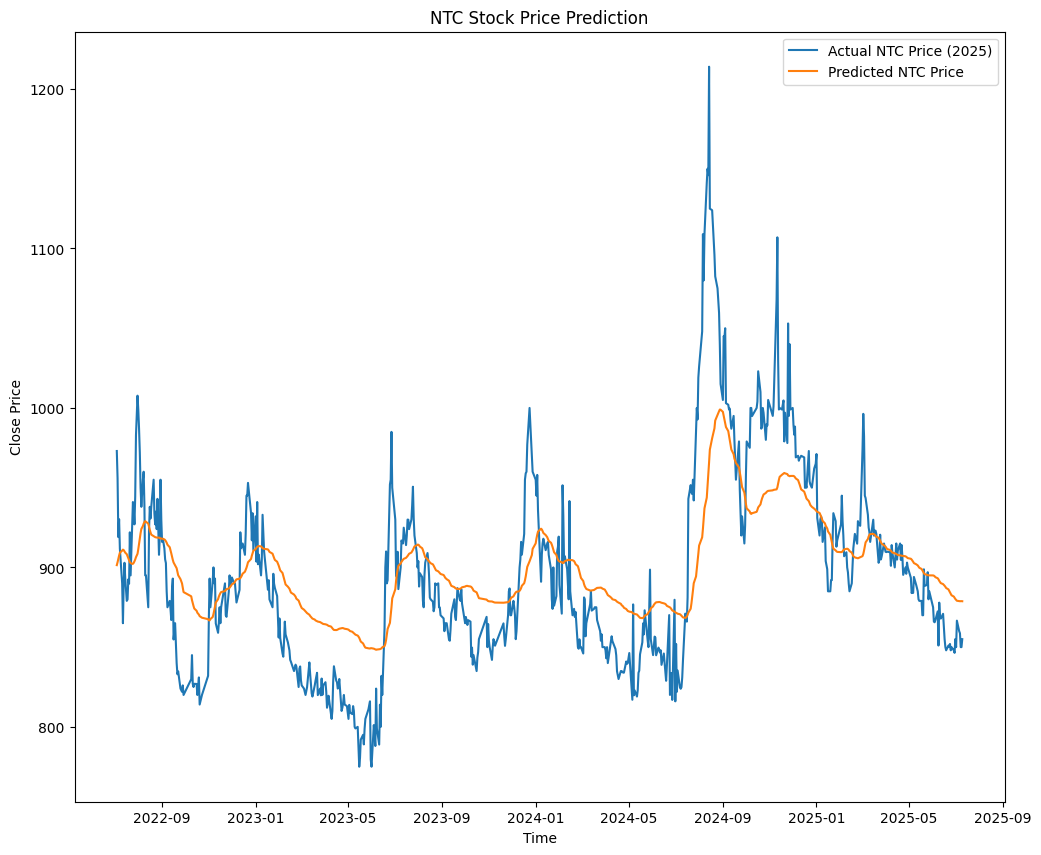

In [28]:
import matplotlib.pyplot as plt

test_dates = df['Date'].iloc[adjusted_split_index + 60:].reset_index(drop=True)

plt.figure(figsize=(12,10))
plt.plot(test_dates,actual_prices, label='Actual NTC Price (2025)')
plt.plot(test_dates,predicted_prices, label='Predicted NTC Price')
plt.title("NTC Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


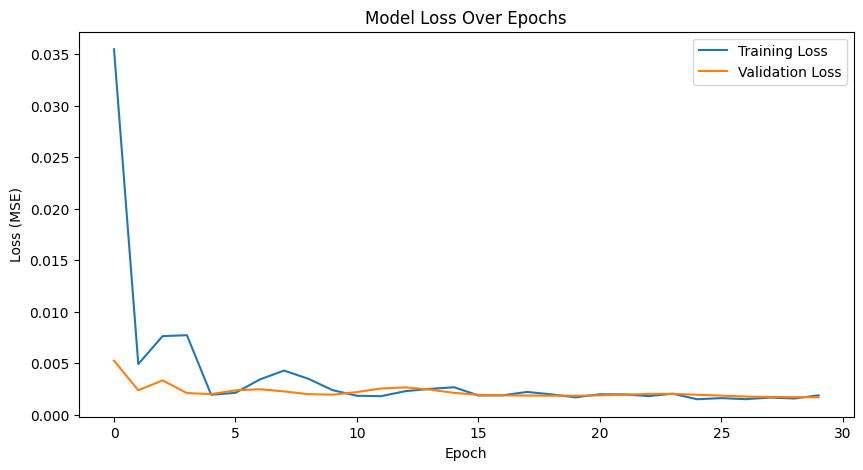

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()